**Problem statement:
Dental Health Prediction Model Using Oral Hygiene Habits
● Objective: Develop a predictive model to assess dental health risks based on oral hygiene habits. 
● Requirements: ● Use open-source medical datasets related to dental health (if available) or general health datasets where dental health factors are included or create your own random dataset. 
● Include variables like brushing frequency, fl ossing habits, and sugar consumption in the model. ● Analyze the data to identify patterns and correlations that could predict dental health issues

# Creating dental health dataset 

**The random dataset is created as synthetic data for the purpose of demonstrating and experimenting with various data analysis and machine learning tasks. 

In [1]:
import pandas as pd
import numpy as np

# Set a random seed for reproducibility
np.random.seed(90)

# Generate synthetic data for a sample population
num_people = 15000

data = {
    'ID': np.arange(1, num_people + 1),
    'Age': np.random.randint(18, 65, num_people),
    'Gender': np.random.choice(['Male', 'Female'], num_people),
    'Brushing_Frequency': np.random.choice(['Daily', 'Twice a day', 'Once every few days'], num_people),
    'Flossing_Habits': np.random.choice(['Regularly', 'Occasionally', 'Rarely'], num_people),
    'Sugar_Consumption': np.random.choice(['Low', 'Moderate', 'High'], num_people),
    'Dental_Checkups': np.random.choice(['Regular', 'Irregular', 'None'], num_people),
    'Gum_Disease_Risk': np.random.choice(['Low', 'Moderate', 'High'], num_people),
}


# Create a DataFrame
df = pd.DataFrame(data)

# Display the first few rows of the dataset
print(df.head())

# Save the dataset to a CSV file
df.to_csv('dental_health_dataset.csv', index=False)


   ID  Age  Gender   Brushing_Frequency Flossing_Habits Sugar_Consumption  \
0   1   45  Female          Twice a day    Occasionally               Low   
1   2   47  Female  Once every few days    Occasionally              High   
2   3   49  Female          Twice a day       Regularly              High   
3   4   21  Female  Once every few days          Rarely          Moderate   
4   5   57  Female          Twice a day    Occasionally               Low   

  Dental_Checkups Gum_Disease_Risk  
0       Irregular             High  
1         Regular             High  
2         Regular             High  
3         Regular             High  
4            None              Low  


**Here, we can select Gum_disease_risk column as our target column that means the predictive model that is going to be built will predict whether the individual will have gum disease or not based on the other column 

## Understanding data and descriptive statistics 

In [2]:
df.shape
# no. of rows and columns in dataset

(15000, 8)

In [3]:
df.columns
#attribute in the dataset

Index(['ID', 'Age', 'Gender', 'Brushing_Frequency', 'Flossing_Habits',
       'Sugar_Consumption', 'Dental_Checkups', 'Gum_Disease_Risk'],
      dtype='object')

In [4]:
df['Gum_Disease_Risk'].unique()
#This is our target column

array(['High', 'Low', 'Moderate'], dtype=object)

In [5]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  15000 non-null  int32 
 1   Age                 15000 non-null  int32 
 2   Gender              15000 non-null  object
 3   Brushing_Frequency  15000 non-null  object
 4   Flossing_Habits     15000 non-null  object
 5   Sugar_Consumption   15000 non-null  object
 6   Dental_Checkups     15000 non-null  object
 7   Gum_Disease_Risk    15000 non-null  object
dtypes: int32(2), object(6)
memory usage: 820.4+ KB
None


In [6]:
# Summary statistics for numerical columns
print(df.describe())

                 ID           Age
count  15000.000000  15000.000000
mean    7500.500000     41.001067
std     4330.271354     13.482027
min        1.000000     18.000000
25%     3750.750000     29.000000
50%     7500.500000     41.000000
75%    11250.250000     53.000000
max    15000.000000     64.000000


In [7]:
# Display descriptive statistics for object (categorical) columns in the DataFrame
df.describe(include='object')

,Gender,Brushing_Frequency,Flossing_Habits,Sugar_Consumption,Dental_Checkups,Gum_Disease_Risk
count,15000,15000,15000,15000,15000,15000
unique,2,3,3,3,3,3
top,Male,Once every few days,Rarely,High,None,Moderate
freq,7518,5048,5124,5135,5085,5061


In [8]:
df['Gum_Disease_Risk'].value_counts(normalize=True)*100
#data is balanced

Moderate    33.740000
Low         33.233333
High        33.026667
Name: Gum_Disease_Risk, dtype: float64

In [9]:
df[df.duplicated()]
#no duplicate rows

,ID,Age,Gender,Brushing_Frequency,Flossing_Habits,Sugar_Consumption,Dental_Checkups,Gum_Disease_Risk


In [10]:
#mean is equal to median , hence our data is normally distributed

# Univariate analysis of the dataset

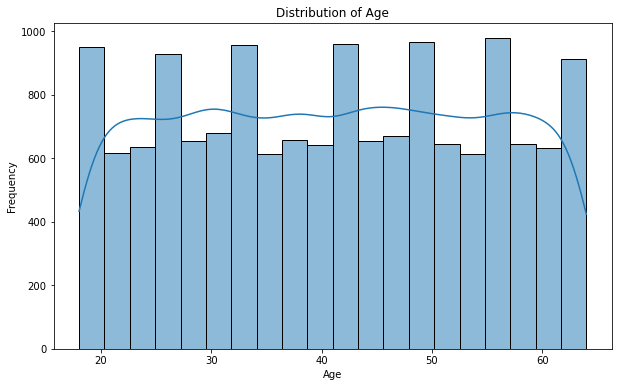

In [11]:
# Distribution of numerical column Age using histogram to confirm descriptive analysis result
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


**The histogram shows that the age distribution is relatively uniform, with a peak around 41. Most individuals in the dataset are between 18 and 65 years old.

In [12]:
# let us now plot countplot of all object variables
#filtering categorical columns from the dataset to plot countplot
categorical_col=df.select_dtypes(include='object').columns

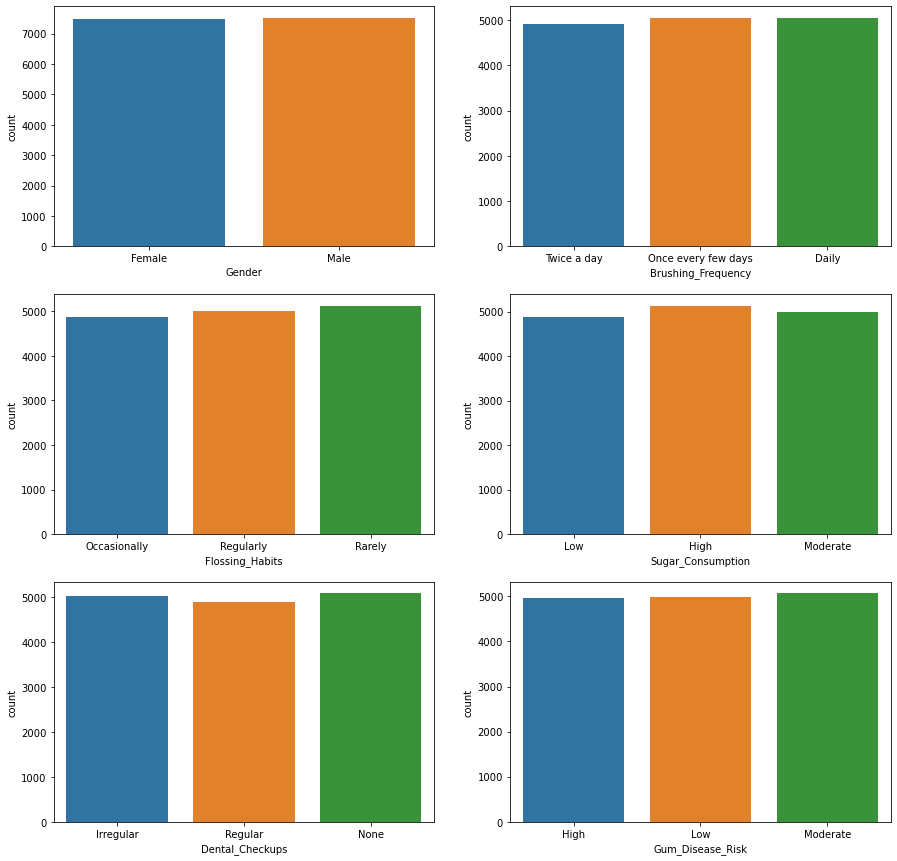

In [13]:
# Calculate the number of rows and columns for subplots
num_rows = len(categorical_col) // 2
num_columns = 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 5 * num_rows))

# Flatten the axes array to handle the case when there is only one row
axes = axes.flatten()

# Iterate through categorical columns and plot countplots
for i, column in enumerate(categorical_col):
    sns.countplot(x=column, data=df, ax=axes[i])
    


**there is no significant imbalance in any feature.**

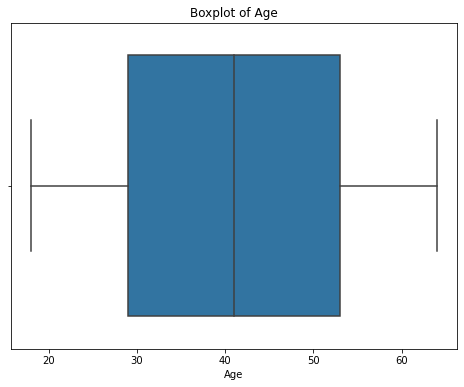

In [14]:
# Create a boxplot for the 'Age' column
plt.figure(figsize=(8, 6))
sns.boxplot(x='Age', data=df)
plt.title('Boxplot of Age')
plt.show()
#No outliers in the age column
#data is not skewed in the age column

# Bivariate analysis 

### lets first analyse each variable with our target column i.e. 'Gum_Disease_Risk'

#### Age vs 'Gum_Disease_Risk'


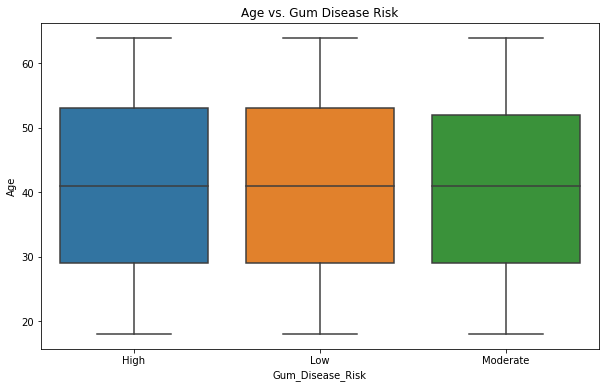

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gum_Disease_Risk', y='Age', data=df)
plt.title('Age vs. Gum Disease Risk')
plt.show()

**All type of gum disease risk (high , moderate , low) have median around 40 years of age. So people with age in the bracket of 30-50 are at higher risk.**

#### Brushing Frequency vs. Gum Disease Risk

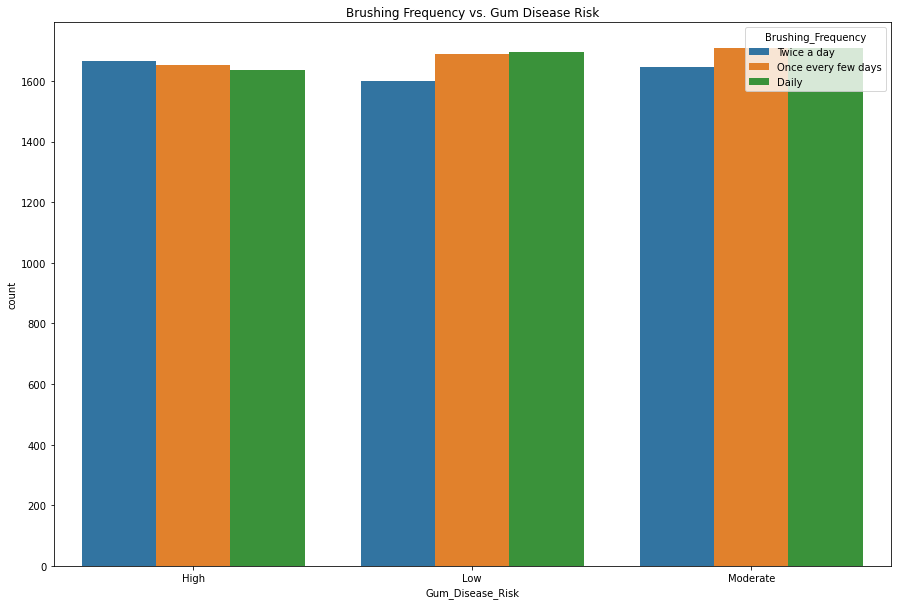

In [16]:

plt.figure(figsize=(15, 10))
sns.countplot(x='Gum_Disease_Risk', hue='Brushing_Frequency', data=df)
plt.title('Brushing Frequency vs. Gum Disease Risk')
plt.show()

**Above plot tells gum disease risk is low when individual brushes twice a day. Gum disease risk is moderate and high when individual brushes once in every few days. This suggests a positive relationship between regular brushing habits and reduced gum disease risk.**

#### Gender vs. Gum Disease Risk

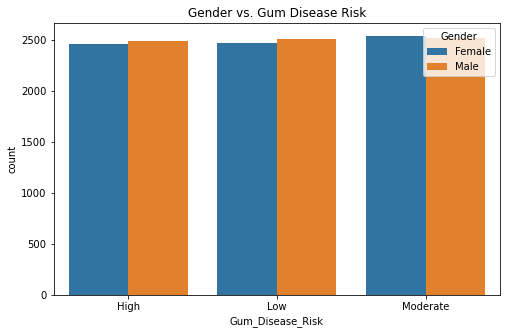

In [17]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Gum_Disease_Risk', hue='Gender', data=df)
plt.title('Gender vs. Gum Disease Risk')
plt.show()

**Gum disease risk are moderate and high in male as compared to female.**

#### Flossing Habits vs. Gum Disease Risk


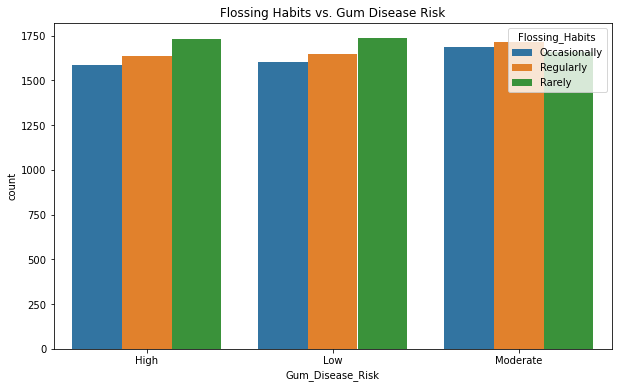

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Gum_Disease_Risk', hue='Flossing_Habits', data=df)
plt.title('Flossing Habits vs. Gum Disease Risk')
plt.show()

**Individuals who floss rarely have a high risk of gum disease. This tells the importance of regular flossing as a potential protective factor against gum disease.**

#### Sugar Consumption vs. Gum Disease Risk 


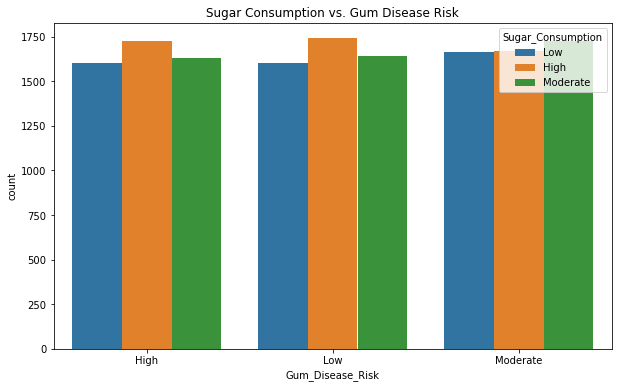

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Gum_Disease_Risk', hue='Sugar_Consumption', data=df)
plt.title('Sugar Consumption vs. Gum Disease Risk')
plt.show()


**Individuals with low sugar consumption have a lower risk of gum disease, while those with high consumption may have a higher risk.

#### Dental Checkups vs. Gum Disease Risk


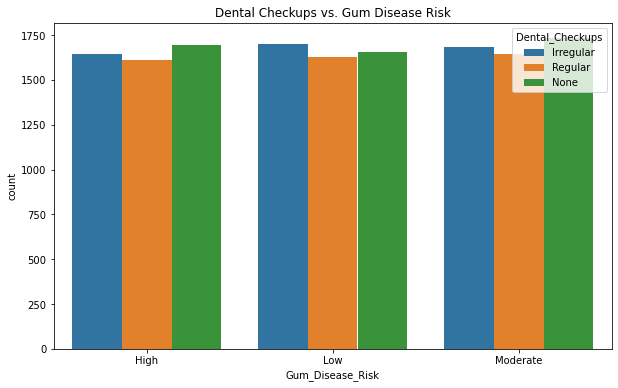

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Gum_Disease_Risk', hue='Dental_Checkups', data=df)
plt.title('Dental Checkups vs. Gum Disease Risk')
plt.show()


**Risk of getting gum disease risk gets slighty high when dental checkups are none.

#### Flossing Habits vs. Brushing Frequency


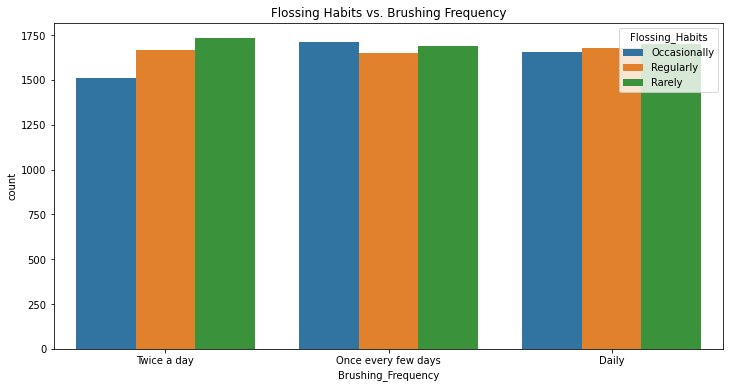

In [21]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Brushing_Frequency', hue='Flossing_Habits', data=df)
plt.title('Flossing Habits vs. Brushing Frequency')
plt.show()


**Individuals who brush teeth twice a day flosses rarely.


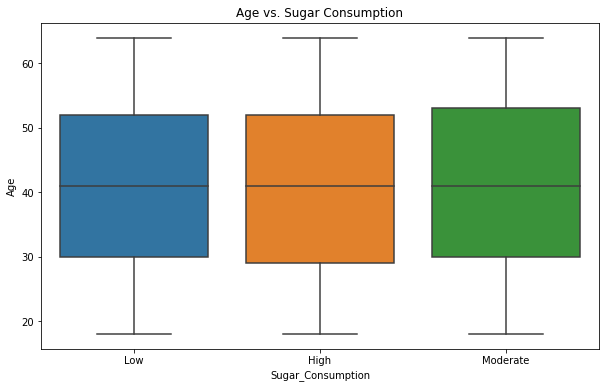

In [22]:
#Age vs. Sugar Consumption (Boxplot):
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sugar_Consumption', y='Age', data=df)
plt.title('Age vs. Sugar Consumption')
plt.show()


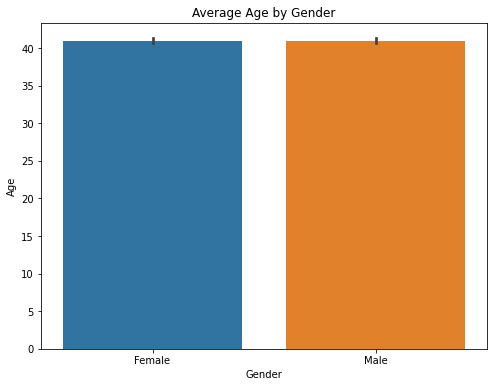

In [23]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Age', data=df)
plt.title('Average Age by Gender')
plt.show()
# data is balanced for male and female

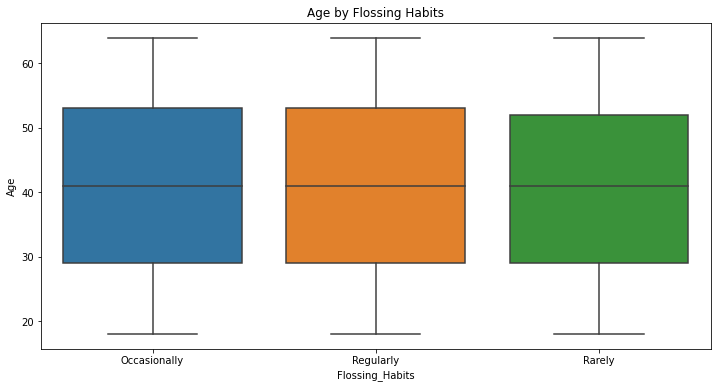

In [24]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Flossing_Habits', y='Age', data=df)
plt.title('Age by Flossing Habits')
plt.show()
# flossing habbit is regular for the age 40 

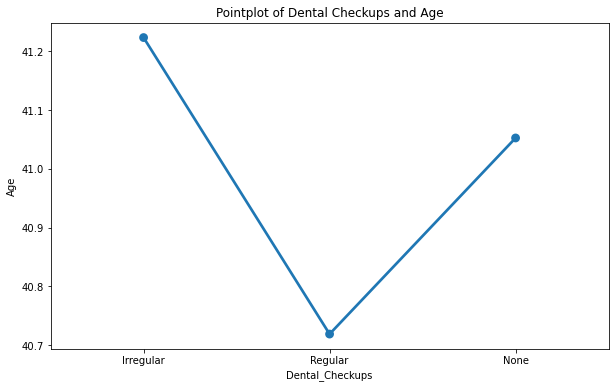

In [25]:
plt.figure(figsize=(10, 6))
sns.pointplot(x='Dental_Checkups', y='Age', data=df, ci=None)
plt.title('Pointplot of Dental Checkups and Age')
plt.show()
# dental checkups gets irregular after the age of 40 

## Data Preprocessing

**Data has no null values and outliers.
We will proceed with encoding of the categorical variable to convert it to numerical.
Also, we can perform scaling of the numerical variable age.**

In [26]:
#Convert 'Gum_Disease_Risk' to numerical using label encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Gum_Disease_Risk'] = label_encoder.fit_transform(df['Gum_Disease_Risk'])

In [27]:
#Remove Unnecessary Column
df = df.drop('ID', axis=1)


In [28]:
from sklearn.preprocessing import StandardScaler

# Example: Standardize numerical columns like 'Age'
scaler = StandardScaler()
df['Age'] = scaler.fit_transform(df[['Age']])

In [29]:
# Identify categorical columns for one-hot encoding
categorical_cols = df.select_dtypes(include='object').columns

# Perform one-hot encoding for all categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_cols)

# Display the first few rows of the encoded dataset
print(df_encoded.head())

        Age  Gum_Disease_Risk  Gender_Female  Gender_Male  \
0  0.296622                 0              1            0   
1  0.444973                 0              1            0   
2  0.593323                 0              1            0   
3 -1.483585                 0              1            0   
4  1.186726                 1              1            0   

   Brushing_Frequency_Daily  Brushing_Frequency_Once every few days  \
0                         0                                       0   
1                         0                                       1   
2                         0                                       0   
3                         0                                       1   
4                         0                                       0   

   Brushing_Frequency_Twice a day  Flossing_Habits_Occasionally  \
0                               1                             1   
1                               0                             1   
2    

## Models Training, Optimisation and Evaluation

### Logistic Regression Model

In [30]:
#Logistic regression model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [31]:
# Assuming 'Gum_Disease_Risk' is the target variable
X = df_encoded.drop('Gum_Disease_Risk', axis=1)
y = df_encoded['Gum_Disease_Risk']

In [32]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
model = LogisticRegression()

In [34]:
# Train the model
model.fit(X_train, y_train)

LogisticRegression()

In [35]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [36]:
# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[164 372 474]
 [147 344 476]
 [166 384 473]]

Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.16      0.22      1010
           1       0.31      0.36      0.33       967
           2       0.33      0.46      0.39      1023

    accuracy                           0.33      3000
   macro avg       0.33      0.33      0.31      3000
weighted avg       0.33      0.33      0.31      3000


Accuracy Score: 0.327


An accuracy score of 0.323 means that the logistic regression model correctly predicted the target variable for approximately 32.3% of the test set observations.

### KNN Model

In [37]:
# K nearest neghbor
from sklearn.neighbors import KNeighborsClassifier
# Initialize the KNN model with k=5 (you can adjust k as needed)
model_knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
model_knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = model_knn.predict(X_test)

# Evaluate the KNN model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_knn))

Confusion Matrix:
 [[481 336 193]
 [442 324 201]
 [447 348 228]]

Classification Report:
               precision    recall  f1-score   support

           0       0.35      0.48      0.40      1010
           1       0.32      0.34      0.33       967
           2       0.37      0.22      0.28      1023

    accuracy                           0.34      3000
   macro avg       0.35      0.34      0.34      3000
weighted avg       0.35      0.34      0.34      3000


Accuracy Score: 0.3443333333333333


### KNN model Using GridSearchCV

In [38]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Adjust as needed
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

# Initialize the KNN model
knn_model = KNeighborsClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy')

# Fit the model with GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)

# Make predictions on the test set using the best model
y_pred_knn_grid = grid_search.predict(X_test)

# Evaluate the model
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_knn_grid))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn_grid))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_knn_grid))


Best Parameters: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}

Confusion Matrix:
 [[429 324 257]
 [428 299 240]
 [454 318 251]]

Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.42      0.37      1010
           1       0.32      0.31      0.31       967
           2       0.34      0.25      0.28      1023

    accuracy                           0.33      3000
   macro avg       0.33      0.33      0.32      3000
weighted avg       0.33      0.33      0.32      3000


Accuracy Score: 0.3263333333333333


### Decision Tree Model

In [39]:
# Decision tree model
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = decision_tree_model.predict(X_test)

# Evaluate the Decision Tree model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_dt))

Confusion Matrix:
 [[426 327 257]
 [431 308 228]
 [463 319 241]]

Classification Report:
               precision    recall  f1-score   support

           0       0.32      0.42      0.37      1010
           1       0.32      0.32      0.32       967
           2       0.33      0.24      0.28      1023

    accuracy                           0.33      3000
   macro avg       0.33      0.33      0.32      3000
weighted avg       0.33      0.33      0.32      3000


Accuracy Score: 0.325


### Decision Tree Model using GridsearchCV

In [40]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Decision Tree
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV
grid_search_dt = GridSearchCV(decision_tree_model, param_grid_dt, cv=5, scoring='accuracy')

# Fit the model with GridSearchCV
grid_search_dt.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print("Best Parameters:", grid_search_dt.best_params_)

# Make predictions on the test set using the best model
y_pred_dt_grid = grid_search_dt.predict(X_test)

# Evaluate the model
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt_grid))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt_grid))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_dt_grid))


Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}

Confusion Matrix:
 [[435 259 316]
 [400 239 328]
 [426 274 323]]

Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.43      0.38      1010
           1       0.31      0.25      0.27       967
           2       0.33      0.32      0.32      1023

    accuracy                           0.33      3000
   macro avg       0.33      0.33      0.33      3000
weighted avg       0.33      0.33      0.33      3000


Accuracy Score: 0.3323333333333333


### Support Vector Machine Model

In [41]:
#Support vector machine

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Assuming 'Gum_Disease_Risk' is the target variable
X = df_encoded.drop('Gum_Disease_Risk', axis=1)
y = df_encoded['Gum_Disease_Risk']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVM model
svm_model = SVC(random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the SVM model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_svm))


Confusion Matrix:
 [[354 327 329]
 [343 303 321]
 [319 376 328]]

Classification Report:
               precision    recall  f1-score   support

           0       0.35      0.35      0.35      1010
           1       0.30      0.31      0.31       967
           2       0.34      0.32      0.33      1023

    accuracy                           0.33      3000
   macro avg       0.33      0.33      0.33      3000
weighted avg       0.33      0.33      0.33      3000


Accuracy Score: 0.3283333333333333


### Supoort vector machine using GridsearchCV

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Assuming 'Gum_Disease_Risk' is the target variable
X = df_encoded.drop('Gum_Disease_Risk', axis=1)
y = df_encoded['Gum_Disease_Risk']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Initialize the SVM model
svm_model = SVC(random_state=42)

# Initialize GridSearchCV
grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=5, scoring='accuracy')

# Fit the model with GridSearchCV
grid_search_svm.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print("Best Parameters:", grid_search_svm.best_params_)

# Make predictions on the test set using the best model
y_pred_svm_grid = grid_search_svm.predict(X_test)

# Evaluate the model
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm_grid))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm_grid))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_svm_grid))


Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

Confusion Matrix:
 [[348 334 328]
 [341 300 326]
 [304 362 357]]

Classification Report:
               precision    recall  f1-score   support

           0       0.35      0.34      0.35      1010
           1       0.30      0.31      0.31       967
           2       0.35      0.35      0.35      1023

    accuracy                           0.34      3000
   macro avg       0.33      0.33      0.33      3000
weighted avg       0.34      0.34      0.34      3000


Accuracy Score: 0.335


### Random Forest Model

In [43]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)
y_pred_rf = random_forest_model.predict(X_test)
print("\nRandom Forest:")
print("Accuracy Score:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))



Random Forest:
Accuracy Score: 0.32766666666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.32      0.33      0.33      1010
           1       0.32      0.32      0.32       967
           2       0.34      0.33      0.34      1023

    accuracy                           0.33      3000
   macro avg       0.33      0.33      0.33      3000
weighted avg       0.33      0.33      0.33      3000



### Gradient Boosting Model

In [44]:
# Gradient Boosting
gradient_boosting_model = GradientBoostingClassifier(random_state=42)
gradient_boosting_model.fit(X_train, y_train)
y_pred_gb = gradient_boosting_model.predict(X_test)
print("\nGradient Boosting:")
print("Accuracy Score:", accuracy_score(y_test, y_pred_gb))
print("Classification Report:\n", classification_report(y_test, y_pred_gb))



Gradient Boosting:
Accuracy Score: 0.339
Classification Report:
               precision    recall  f1-score   support

           0       0.35      0.27      0.31      1010
           1       0.32      0.37      0.35       967
           2       0.35      0.37      0.36      1023

    accuracy                           0.34      3000
   macro avg       0.34      0.34      0.34      3000
weighted avg       0.34      0.34      0.34      3000



### Naive Bayes Thoerum

In [45]:
from sklearn.naive_bayes import GaussianNB

naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)
y_pred_nb = naive_bayes_model.predict(X_test)
print("\nNaive Bayes (Gaussian):")
print("Accuracy Score:", accuracy_score(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))


Naive Bayes (Gaussian):
Accuracy Score: 0.33266666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.35      0.20      0.25      1010
           1       0.32      0.35      0.33       967
           2       0.34      0.45      0.39      1023

    accuracy                           0.33      3000
   macro avg       0.33      0.33      0.32      3000
weighted avg       0.33      0.33      0.32      3000



### Random Search CV on Random Forest

In [46]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Assuming 'Gum_Disease_Risk' is the target variable
X = df_encoded.drop('Gum_Disease_Risk', axis=1)
y = df_encoded['Gum_Disease_Risk']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter distribution for RandomizedSearchCV
param_dist_rf = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Initialize the Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search_rf = RandomizedSearchCV(random_forest_model, param_distributions=param_dist_rf, n_iter=50, cv=5, scoring='accuracy', random_state=42)

# Fit the model with RandomizedSearchCV
random_search_rf.fit(X_train, y_train)

# Print the best parameters found by RandomizedSearchCV
print("Best Parameters:", random_search_rf.best_params_)

# Make predictions on the test set using the best model
y_pred_rf_random = random_search_rf.predict(X_test)

# Evaluate the model
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_random))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf_random))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_rf_random))


C:\Users\vaish\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
90 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\vaish\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\vaish\anaconda3\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\vaish\anaconda3\lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\vaish\anaconda3\lib\site-packages

Best Parameters: {'n_estimators': 150, 'min_samples_split': 5, 'min_samples_leaf': 8, 'max_features': 'log2', 'max_depth': 5, 'bootstrap': True}

Confusion Matrix:
 [[209 386 415]
 [214 354 399]
 [183 414 426]]

Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.21      0.26      1010
           1       0.31      0.37      0.33       967
           2       0.34      0.42      0.38      1023

    accuracy                           0.33      3000
   macro avg       0.33      0.33      0.32      3000
weighted avg       0.33      0.33      0.32      3000


Accuracy Score: 0.32966666666666666


**Accuracy score of the models

In [47]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("K-Nearest Neighbors Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Support Vector Machine Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))


Logistic Regression Accuracy: 0.327
K-Nearest Neighbors Accuracy: 0.3443333333333333
Decision Tree Accuracy: 0.325
Support Vector Machine Accuracy: 0.3283333333333333
Random Forest Accuracy: 0.32766666666666666
Gradient Boosting Accuracy: 0.339
Naive Bayes Accuracy: 0.33266666666666667


**Conclusion : For the given dataset, Random Forest Model can be proven as the best classifier with highest accuracy and highest precision.
Despite data preprocessing and hyperparameter tuning, accuracy of the models is not satisfactory. This may be due to the reason regarding our synthetic dataset which might not be representing the real world data.**